In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='GnXc9EEJzUxGXuIYI5Jc1wtUtSIx0mflsugYSxU2II1F',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'carresalevalueprediction-donotdelete-pr-qcz31ey2lt7mo9'
object_key = 'data.xlsx'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']

df= pd.read_excel(body.read())
df.head()

,name,year,Selling_Price,Kms_driven,Fuel_type,Seller_Type,Transmission,owner,engine
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,1298.0


In [3]:
df.isnull().sum()

name               0
year               0
Selling_Price      0
Kms_driven         0
Fuel_type          0
Seller_Type        0
Transmission       0
owner              0
engine           221
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

name             0
year             0
Selling_Price    0
Kms_driven       0
Fuel_type        0
Seller_Type      0
Transmission     0
owner            0
engine           0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lef=LabelEncoder()
les=LabelEncoder()
let=LabelEncoder()

In [8]:
df['FuelType']=lef.fit_transform(df.Fuel_type)

In [9]:
df['SellerType']=les.fit_transform(df.Seller_Type)
df['Transmissions']=let.fit_transform(df.Transmission)

In [10]:
df.head(2)

,name,year,Selling_Price,Kms_driven,Fuel_type,Seller_Type,Transmission,owner,engine,FuelType,SellerType,Transmissions
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,1248.0,1,1,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,1498.0,1,1,1


In [11]:
df.drop(['name','Fuel_type','Seller_Type','Transmission'],axis=1,inplace=True)

In [12]:
df.head()

,year,Selling_Price,Kms_driven,owner,engine,FuelType,SellerType,Transmissions
0,2014,450000,145500,1,1248.0,1,1,1
1,2014,370000,120000,2,1498.0,1,1,1
2,2006,158000,140000,3,1497.0,3,1,1
3,2010,225000,127000,1,1396.0,1,1,1
4,2007,130000,120000,1,1298.0,3,1,1


In [13]:
df[['Selling_Price','Kms_driven','engine']].mean()

Selling_Price    649741.656380
Kms_driven        69192.556469
engine             1458.625016
dtype: float64

In [14]:
df[['owner','year','FuelType','SellerType','Transmissions']].mean()

owner               1.444163
year             2013.982168
FuelType            1.888074
SellerType          0.889844
Transmissions       0.868345
dtype: float64

In [15]:
df.describe()

,year,Selling_Price,Kms_driven,owner,engine,FuelType,SellerType,Transmissions
count,7907.000000,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
mean,2013.982168,6.497417e+05,6.919256e+04,1.444163,1458.625016,1.888074,0.889844,0.868345
std,3.866650,8.135565e+05,5.678976e+04,0.706131,503.916303,1.001640,0.397159,0.338137
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,0.000000,0.000000
25%,2012.000000,2.700000e+05,3.500000e+04,1.000000,1197.000000,1.000000,1.000000,1.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,1248.000000,1.000000,1.000000,1.000000
75%,2017.000000,6.900000e+05,9.575000e+04,2.000000,1582.000000,3.000000,1.000000,1.000000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000,3604.000000,3.000000,2.000000,1.000000


In [16]:
df.head(2)

,year,Selling_Price,Kms_driven,owner,engine,FuelType,SellerType,Transmissions
0,2014,450000,145500,1,1248.0,1,1,1
1,2014,370000,120000,2,1498.0,1,1,1


<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

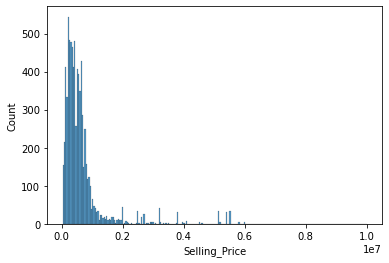

In [17]:
sns.histplot(df.Selling_Price)

<AxesSubplot:xlabel='Kms_driven', ylabel='Density'>

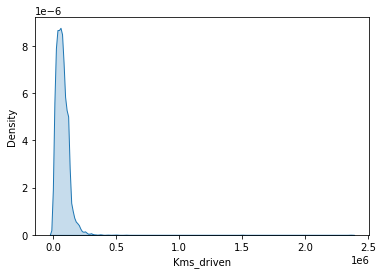

In [18]:
sns.kdeplot(df.Kms_driven,shade=True)

<AxesSubplot:xlabel='engine', ylabel='Count'>

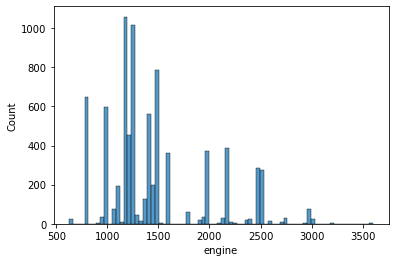

In [19]:
sns.histplot(df.engine)

<AxesSubplot:>

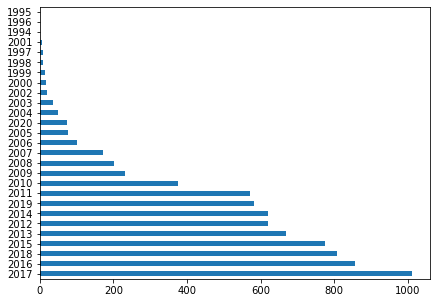

In [20]:
plt.figure(figsize=(7,5))
df.year.value_counts().plot(kind='barh')

<AxesSubplot:>

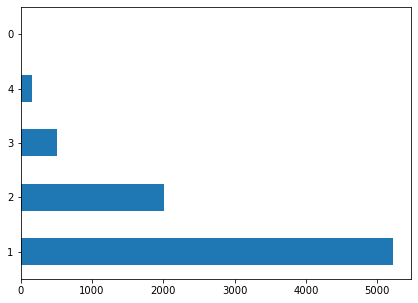

In [21]:
plt.figure(figsize=(7,5))
df.owner.value_counts().plot(kind='barh')

In [22]:
df.head(2)

,year,Selling_Price,Kms_driven,owner,engine,FuelType,SellerType,Transmissions
0,2014,450000,145500,1,1248.0,1,1,1
1,2014,370000,120000,2,1498.0,1,1,1


<AxesSubplot:>

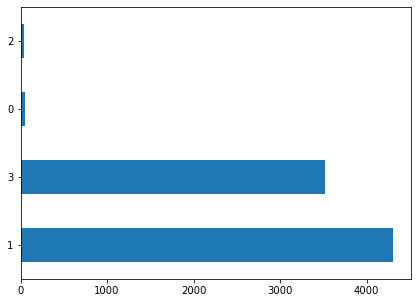

In [23]:
plt.figure(figsize=(7,5))
df.FuelType.value_counts().plot(kind='barh')

<AxesSubplot:>

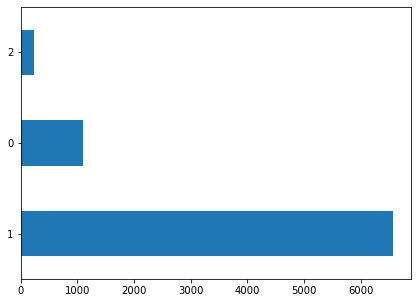

In [24]:
plt.figure(figsize=(7,5))
df.SellerType.value_counts().plot(kind='barh')

<AxesSubplot:>

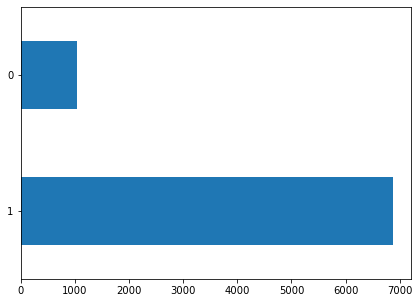

In [25]:
plt.figure(figsize=(7,5))
df.Transmissions.value_counts().plot(kind='barh')

In [26]:
df.shape

(7907, 8)

<AxesSubplot:>

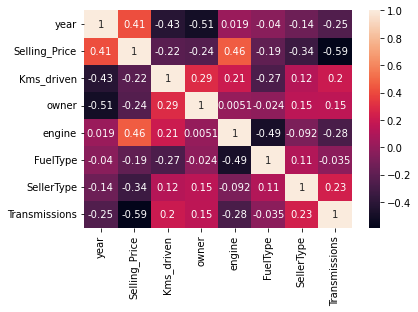

In [27]:
sns.heatmap(df.corr(),annot=True)

In [28]:
x=df.drop('Selling_Price',axis=1)
y=df.Selling_Price

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [32]:
x_train.shape, y_train.shape

((6325, 7), (6325,))

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf = RandomForestRegressor()

In [35]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_pred = rf.predict(x_test)

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [38]:
r2_score(y_test,y_pred)

0.9578442037747447

In [39]:
mean_squared_error(y_test,y_pred)

31513950607.970203

In [40]:
mean_absolute_error(y_test,y_pred)

90420.71644531342

In [41]:
x

,year,Kms_driven,owner,engine,FuelType,SellerType,Transmissions
0,2014,145500,1,1248.0,1,1,1
1,2014,120000,2,1498.0,1,1,1
2,2006,140000,3,1497.0,3,1,1
3,2010,127000,1,1396.0,1,1,1
4,2007,120000,1,1298.0,3,1,1
...,...,...,...,...,...,...,...
8123,2013,110000,1,1197.0,3,1,1
8124,2007,119000,4,1493.0,1,1,1
8125,2009,120000,1,1248.0,1,1,1
8126,2013,25000,1,1396.0,1,1,1


In [42]:
rf.predict([[2014,145500,1,1248.0,1,1,1]])

array([1385280.])

In [43]:
import pickle

In [44]:
pickle.dump(rf,open('model.pkl','wb'))

In [45]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "42YrZ3GQHk8HDl4fvgg8EqgaIt3diGQ9ZBEnyKNSenGh"
}

client = APIClient(wml_credentials)

In [46]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [47]:
space_uid = guid_from_space_name(client, 'CarResaleValuePrediction')
print("Space UID = " + space_uid)

Space UID = d547dac6-52b9-459f-b30e-06646363c8ad


In [48]:
client.set.default_space(space_uid)

'SUCCESS'

In [49]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [50]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [52]:
model_details = client.repository.store_model(model = rf, meta_props={
    client.repository.ModelMetaNames.NAME: "CarResaleValuePrediction",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}
)

model_id = client.repository.get_model_id(model_details)

In [53]:
x_train

array([[-2.05672064, -0.12762011, -0.62796874, ...,  1.11948371,
         0.27590689,  0.38837736],
       [-0.25241886,  0.49063736, -0.62796874, ..., -0.87874811,
         0.27590689,  0.38837736],
       [ 0.77861072, -0.607203  , -0.62796874, ...,  1.11948371,
         0.27590689,  0.38837736],
       ...,
       [-2.82999283,  0.39433557,  0.78602282, ...,  1.11948371,
         0.27590689,  0.38837736],
       [-0.51017626, -0.18347514,  0.78602282, ..., -0.87874811,
         0.27590689,  0.38837736],
       [ 0.00533853,  1.06844808, -0.62796874, ..., -0.87874811,
         0.27590689,  0.38837736]])

In [54]:
x

,year,Kms_driven,owner,engine,FuelType,SellerType,Transmissions
0,2014,145500,1,1248.0,1,1,1
1,2014,120000,2,1498.0,1,1,1
2,2006,140000,3,1497.0,3,1,1
3,2010,127000,1,1396.0,1,1,1
4,2007,120000,1,1298.0,3,1,1
...,...,...,...,...,...,...,...
8123,2013,110000,1,1197.0,3,1,1
8124,2007,119000,4,1493.0,1,1,1
8125,2009,120000,1,1248.0,1,1,1
8126,2013,25000,1,1396.0,1,1,1


In [55]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "42YrZ3GQHk8HDl4fvgg8EqgaIt3diGQ9ZBEnyKNSenGh"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [['year','Kms_driven','owner','engine','FuelType','SellerType','Transmissions']], "values":[[2014,145500,1,1248.0,1,1,1]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/c580a642-669a-4c1b-9dfc-f4e2a8bd31b7/predictions?version=2022-11-24', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[1385280.0]]}]}
